### Pragadeesh M
## 225229126

### 1. Import Libraries

In [1]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU,SimpleRNN # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re
from tensorflow.keras.layers import Bidirectional

In [3]:
english_stops = set(stopwords.words('english'))

### 2. Load Dataset

In [4]:
train = pd.read_csv('IMDB Dataset.csv')
train.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
train.shape

(50000, 2)

In [6]:
train.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
train.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### 3. Preprocessing

In [10]:
def load_dataset():
    df = pd.read_csv('IMDB Dataset.csv')
    X = df['review']      
    y = df['sentiment']   
    X = X.replace({'<.*?>': ''}, regex = True)          
    X = X.replace({'[^A-Za-z]': ' '}, regex = True)     
    X = X.apply(lambda review: [w for w in review.split() if w not in english_stops])  
    X = X.apply(lambda review: [w.lower() for w in review])
    y = y.replace('positive', 1)
    y = y.replace('negative', 0)
    return X, y

X,y = load_dataset()

### 4. Train, Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
def get_max_length():
    review_length = []
    for comment_text in x_train:
        review_length.append(len(comment_text))
    return int(np.ceil(np.mean(review_length)))

### 5. Tokenizing

In [13]:
token = Tokenizer(lower=False)    
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1 

In [14]:
total_words

92210

### 6. LSTM

In [15]:
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           2950720   
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2979777 (11.37 MB)
Trainable params: 2979777 (11.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
history = model.fit(x_train, y_train, batch_size = 128,epochs=2)
model.evaluate(x_test,y_test)

Epoch 1/2
313/313 [==============================] - 83s 245ms/step - loss: 0.4708 - accuracy: 0.7408
Epoch 2/2
313/313 [==============================] - 13s 37ms/step - loss: 0.2897 - accuracy: 0.8861


[0.28970491886138916, 0.8860999941825867]

### 6. GRU

In [17]:
EMBED_DIM = 32
GRU_OUT = 64

model1 = Sequential()
model1.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model1.add(GRU(GRU_OUT))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 130, 32)           2950720   
                                                                 
 gru (GRU)                   (None, 64)                18816     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2973761 (11.34 MB)
Trainable params: 2973761 (11.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history2 = model1.fit(x_train, y_train, batch_size = 128,epochs=2)
model1.evaluate(x_test,y_test)

Epoch 1/2
313/313 [==============================] - 77s 227ms/step - loss: 0.6253 - accuracy: 0.6047
Epoch 2/2
313/313 [==============================] - 10s 29ms/step - loss: 0.3046 - accuracy: 0.8722


[0.30460476875305176, 0.8722000122070312]

### 7. RNN

In [19]:
EMBED_DIM = 32
RNN_OUT = 64

model2 = Sequential()
model2.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model2.add(SimpleRNN(GRU_OUT))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 32)           2950720   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2961153 (11.30 MB)
Trainable params: 2961153 (11.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history3 = model2.fit(x_train, y_train, batch_size = 128,epochs=2)
model2.evaluate(x_test,y_test)

Epoch 1/2
313/313 [==============================] - 34s 100ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 2/2
313/313 [==============================] - 5s 13ms/step - loss: 0.6935 - accuracy: 0.5039


[0.6935302019119263, 0.5038999915122986]

### 8. Model Comparision

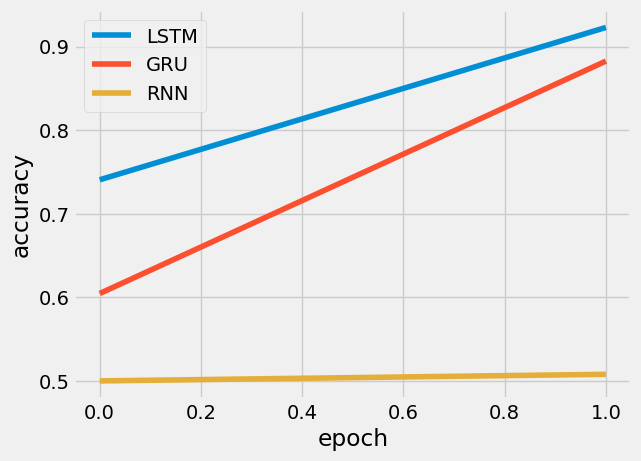

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LSTM', 'GRU','RNN'], loc = 'upper left')
plt.show()  